In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [244]:
df=pd.read_csv("abalone.csv")

In [245]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [246]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [247]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [249]:
print(df.nunique())

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64


In [250]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [251]:
df.sample(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
564,F,0.470,0.355,0.130,0.5465,0.2005,0.1260,0.1850,14
1297,I,0.530,0.415,0.130,0.6940,0.3905,0.1110,0.1670,9
3326,I,0.550,0.415,0.135,0.8095,0.2985,0.2015,0.2800,12
1473,F,0.550,0.430,0.140,0.8400,0.3750,0.2180,0.1945,8
1921,M,0.605,0.470,0.180,1.1155,0.4790,0.2565,0.3210,10


In [252]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [253]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [255]:
 df['age'] = df['Rings']+1.5
 

In [256]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
age               4177 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [258]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [259]:
numerical_features

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'age'],
      dtype='object')

In [260]:
categorical_features

Index(['Sex'], dtype='object')

In [261]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


In [262]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [263]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df_new = pd.concat([df, df_sex_encoded], axis=1)

In [264]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [265]:
df_new[df.Height == 0] 

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,Sex_0,Sex_1,Sex_2
1257,1,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,9.5,0.0,1.0,0.0
3996,1,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,7.5,0.0,1.0,0.0


In [266]:
df_new = df_new[df.Height != 0]
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,Sex_0,Sex_1,Sex_2
count,4175.000000,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,1.052934,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,11.435090,0.313054,0.320958,0.365988
std,0.822437,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,3.224227,0.463792,0.466901,0.481764
min,0.000000,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000,0.000000,0.000000,0.000000
25%,0.000000,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,9.500000,0.000000,0.000000,0.000000
50%,1.000000,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,10.500000,0.000000,0.000000,0.000000
75%,2.000000,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,12.500000,1.000000,1.000000,1.000000
max,2.000000,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000,1.000000,1.000000,1.000000


In [267]:
df_new.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'age', 'Sex_0', 'Sex_1',
       'Sex_2'],
      dtype='object')

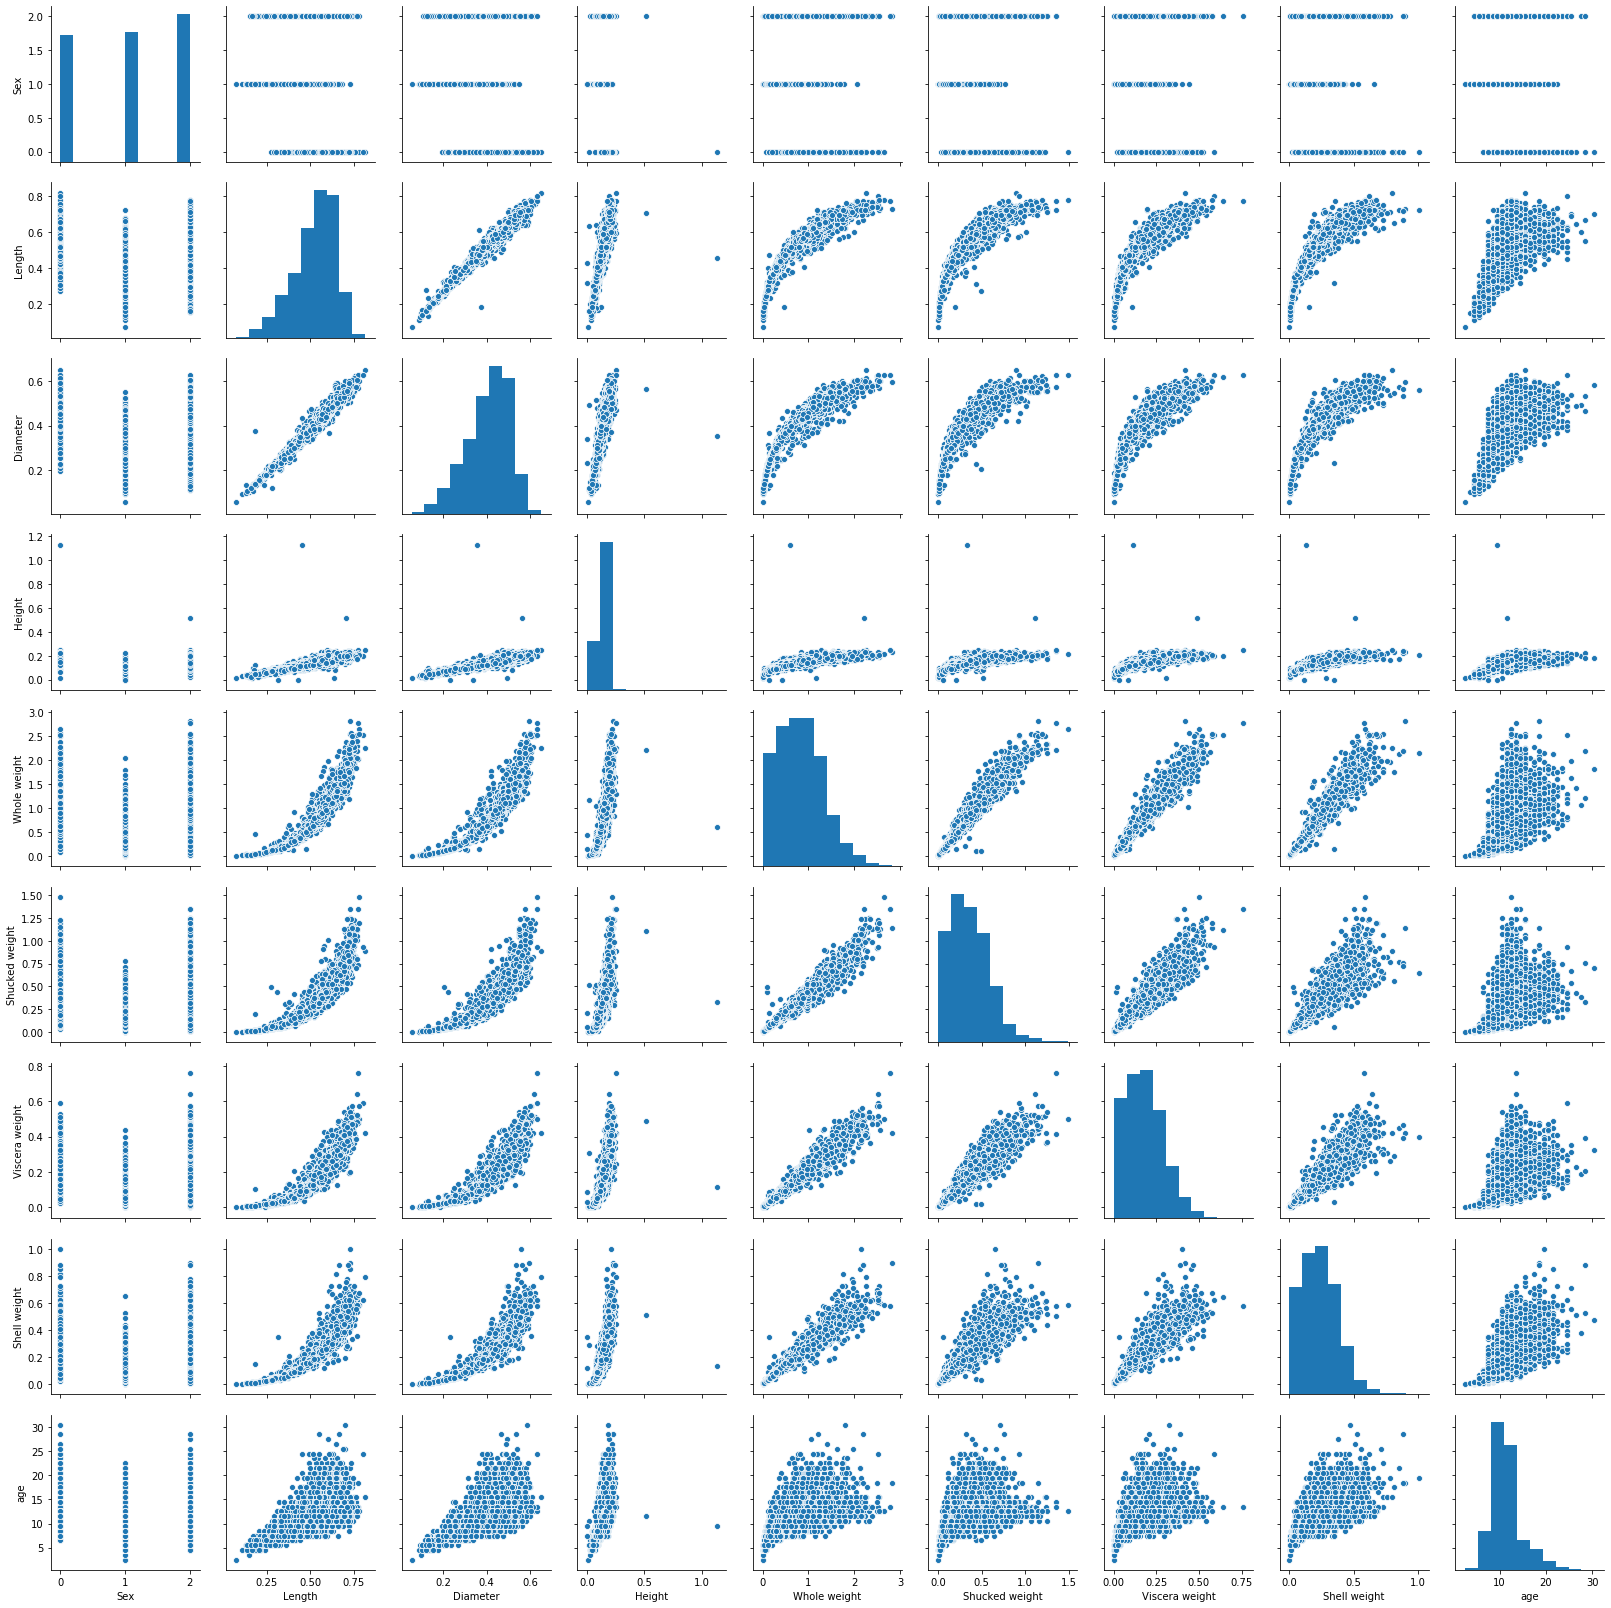

In [185]:
sns.pairplot(df)

In [186]:
print(df_new.shape)

(4175, 12)


In [187]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,1.0,0.0


In [189]:
df_new= df_new.drop(['Sex', 'Sex_0','Sex_1','Sex_2'], axis = 1)

In [190]:
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [191]:
from scipy.stats import zscore
zscore=abs(zscore(df_new))
print(df_new.shape)
df_final=df_new.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(4175, 8)
(4027, 8)


In [192]:
df_final.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
Length,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole weight,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked weight,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera weight,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell weight,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
age,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


In [193]:
df_final.skew()

Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
age               0.725464
dtype: float64

In [194]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
age               1.114102
dtype: float64

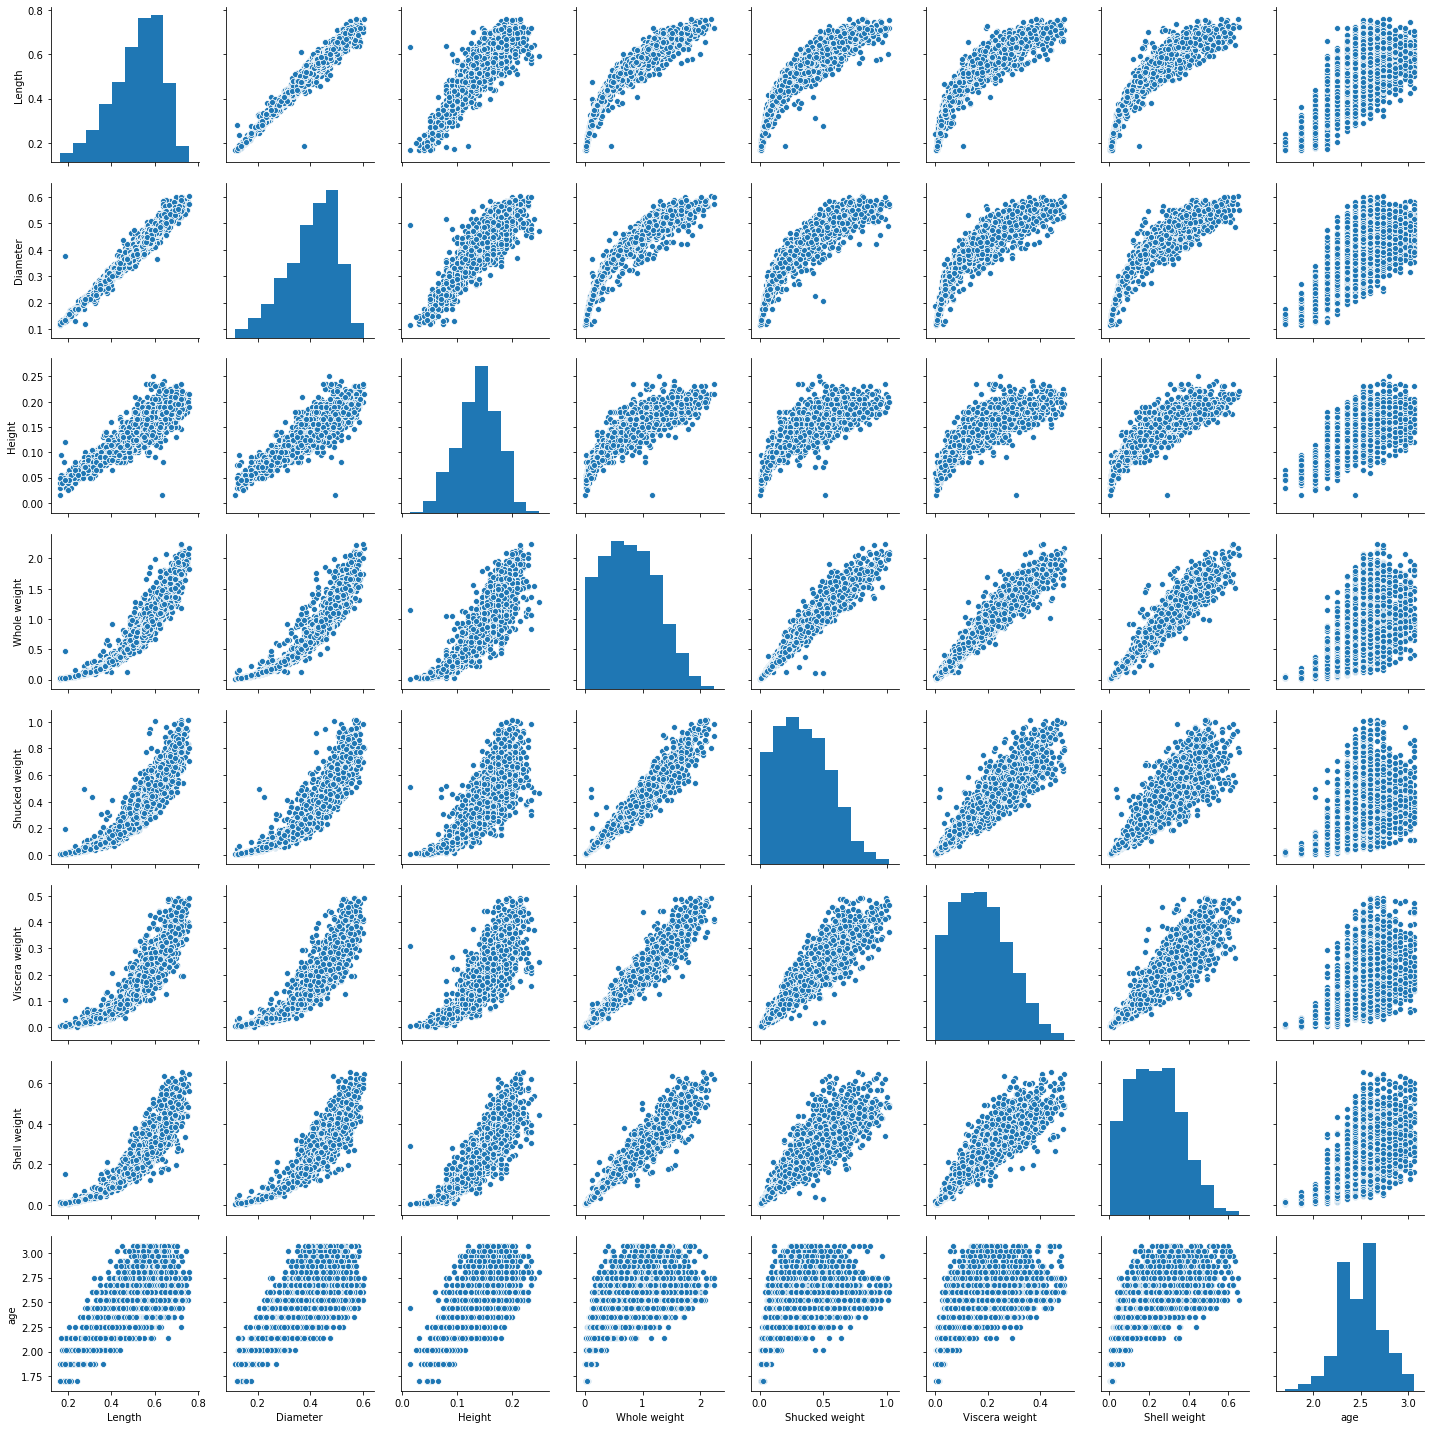

In [195]:
sns.pairplot(df_final)
plt.show()

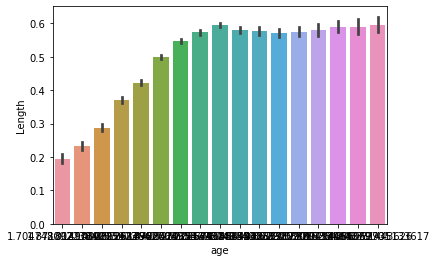

In [196]:
sns.barplot(x="age",y="Length",data=df_final)
plt.show()

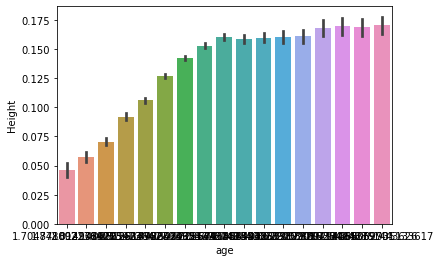

In [197]:
sns.barplot(x="age",y="Height",data=df_final)
plt.show()

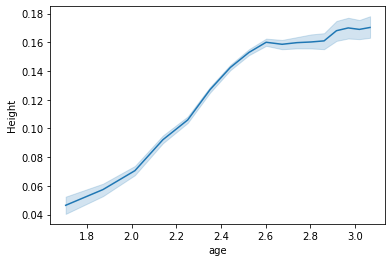

In [199]:
sns.lineplot(x="age",y="Height",data=df_final)
plt.show()

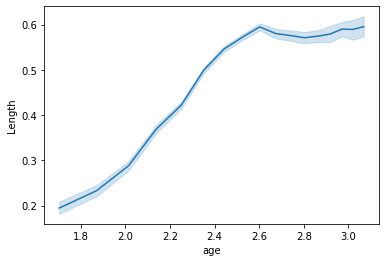

In [200]:
sns.lineplot(x="age",y="Length",data=df_final)
plt.show()

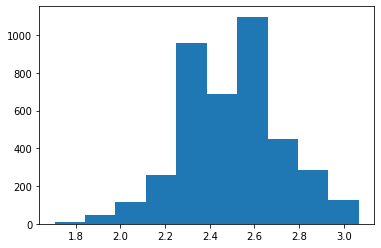

In [202]:
plt.hist(x="age",bins=10,data=df_final)
plt.show()

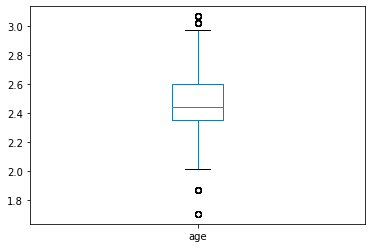

In [203]:
df_final["age"].plot.box()

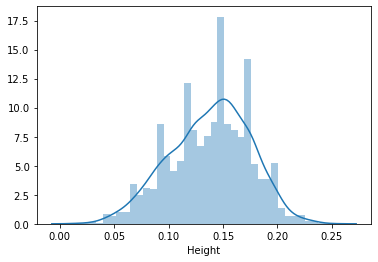

In [204]:
sns.distplot(df_final["Height"])

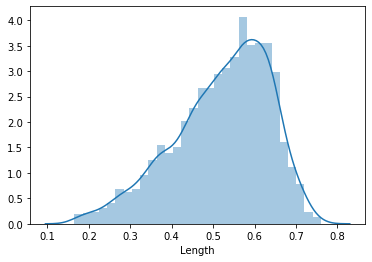

In [205]:
sns.distplot(df_final["Length"])

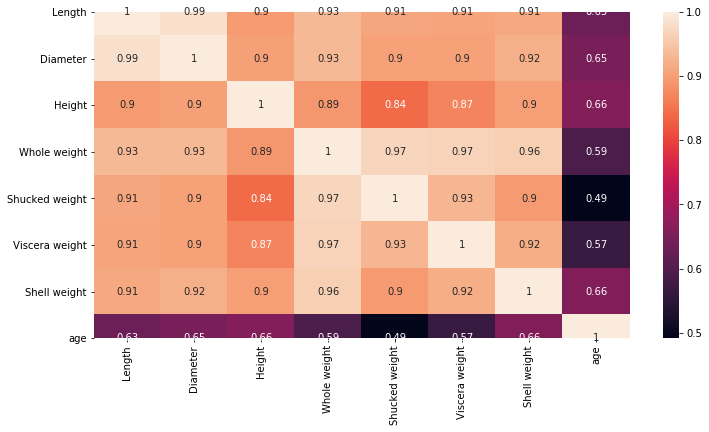

In [206]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(),annot=True)

In [268]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age,Sex_0,Sex_1,Sex_2
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5,0.0,0.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0


In [272]:
Xtrain = df_new.drop(['Rings','age','Sex'], axis = 1)
Ytrain = df_new['Rings']

In [273]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [274]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [275]:
result_acc

0.27358490566037735

In [276]:
df_new['newRings'] = np.where(df_new['Rings'] > 10,1,0)

In [278]:
Xtrain = df_new.drop(['newRings','Rings','age','Sex'], axis = 1)
Ytrain = df_new['newRings']

In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [282]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 
result_acc

0.7735849056603774

In [291]:
from sklearn import svm
Xtrain = df_new.drop(['Rings','age','Sex'], axis = 1)
Ytrain = df_new['Rings']

In [292]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [293]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.37663280116110304

In [294]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred)
result_acc

0.3483309143686502

In [295]:
df_final = df_new.copy()

In [298]:
df_final['newRings_1'] = np.where(df_new['Rings'] <= 8,1,0)
df_final['newRings_2'] = np.where(((df_new['Rings'] <= 10)), 2,0)
df_final['newRings_3'] = np.where(df_new['Rings'] > 10,3,0)

In [299]:
df_final['newRings'] = df_final['newRings_1'] + df_final['newRings_2'] + df_final['newRings_3']

In [302]:
Xtrain = df_final.drop(['Rings','age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = df_final['newRings']

In [303]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [304]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
svmModel.fit(X_train, Y_train)
Y_pred = svmModel.predict(X_test)
result_acc = accuracy_score(Y_test,Y_pred) 
result_acc

0.9905660377358491

In [306]:
from sklearn.externals import joblib
joblib.dump(svmModel, "svm_abalone.pk1")



['svm_abalone.pk1']